# **GRU Exercise**

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf


from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import matplotlib.pyplot as plt


## load the dataset
### Dataset path : 5- Time series forecasting/2-2- Time Series Forecasting (LSTM and GRU)/ LAB/Dataset/traffic.csv


In [3]:
dataframe = pd.read_csv('/content/traffic (1).csv', engine='python')
dataset = dataframe.values


## Data Exploration



In [4]:
dataset.shape

(48120, 4)

In [5]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Junction,48120.0,2.180549e+00,9.669554e-01,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
Vehicles,48120.0,2.279133e+01,2.075006e+01,1.000000e+00,9.000000e+00,1.500000e+01,2.900000e+01,1.800000e+02
ID,48120.0,2.016330e+10,5.944854e+06,2.015110e+10,2.016042e+10,2.016093e+10,2.017023e+10,2.017063e+10


In [6]:
dataframe.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [44]:
numerical_cols = dataframe.select_dtypes(include=['number']).columns
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataframe[numerical_cols])

# If you need the scaled data back in a DataFrame format:
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)

data = dataframe[['Vehicles']]





## Feature Engineering (if needed)



In [45]:
# Create sequences for the GRU model
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

## Exploratory Data Analysis


In [46]:
# Define sequence length
seq_length = 20

# Create the sequences
X, y = create_sequences(scaled_data, seq_length)

# Reshape the data for the GRU model
X = X.reshape((X.shape[0], X.shape[1], 1))

## split into train and test sets

In [47]:
# Split the data into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

## Model Building



In [48]:
# Build the GRU model
model = Sequential([
    GRU(units=7, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    GRU(units=7, return_sequences=False),
    Dense(units=10),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3848/3848 ━━━━━━━━━━━━━━━━━━━━ 54s 13ms/step - loss: 0.0109 - val_loss: 0.0017
Epoch 2/10
3848/3848 ━━━━━━━━━━━━━━━━━━━━ 81s 13ms/step - loss: 1.7179e-05 - val_loss: 0.0012
Epoch 3/10
3848/3848 ━━━━━━━━━━━━━━━━━━━━ 83s 13ms/step - loss: 1.4784e-05 - val_loss: 9.0702e-04
Epoch 4/10
3848/3848 ━━━━━━━━━━━━━━━━━━━━ 81s 13ms/step - loss: 1.5068e-05 - val_loss: 7.3289e-04
Epoch 5/10
3848/3848 ━━━━━━━━━━━━━━━━━━━━ 50s 13ms/step - loss: 9.7961e-06 - val_loss: 6.1786e-04
Epoch 6/10
3848/3848 ━━━━━━━━━━━━━━━━━━━━ 82s 13ms/step - loss: 6.9457e-06 - val_loss: 9.8511e-04
Epoch 7/10
3848/3848 ━━━━━━━━━━━━━━━━━━━━ 82s 13ms/step - loss: 2.9916e-06 - val_loss: 5.0961e-04
Epoch 8/10
3848/3848 ━━━━━━━━━━━━━━━━━━━━ 49s 13ms/step - loss: 5.0536e-06 - val_loss: 4.9060e-04
Epoch 9/10
3848/3848 ━━━━━━━━━━━━━━━━━━━━ 83s 13ms/step - loss: 1.2568e-05 - val_loss: 4.8715e-04
Epoch 10/10
3848/3848 ━━━━━━━━━━━━━━━━━━━━ 81s 13ms/step - loss: 2.7129e-06 - val_loss: 4.8390e-04


## Fitting The Model



In [ ]:
#done it above with the bulding model

## Make preductuion and evaluatuin matrix.

In [49]:
# Make predictions
predicted = model.predict(X_test)
trainPredict = model.predict(X_train)




301/301 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step


## Visualize the result

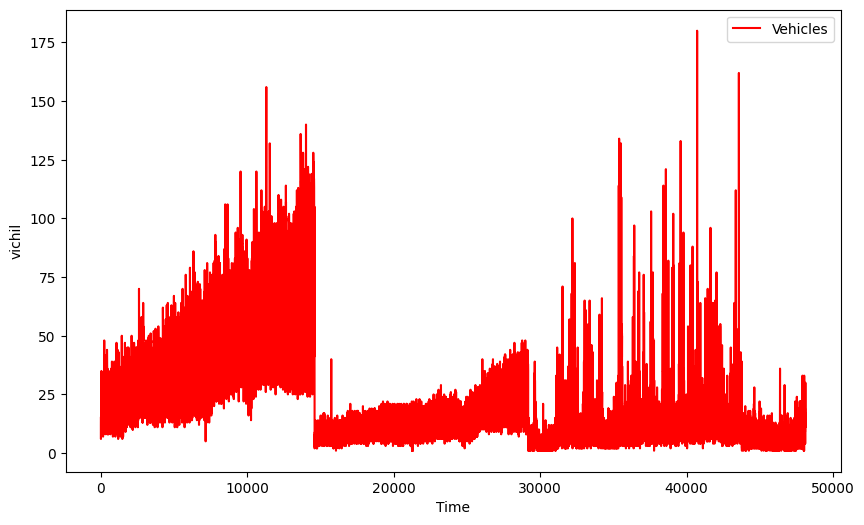

In [51]:
plt.figure(figsize=(10, 6))

plt.plot(data, color='red', label='Vehicles')

plt.xlabel('Time')
plt.ylabel('vichil')
plt.legend()
plt.show()


# **Well done** :)